### Loading Libraries and Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
198,1,NaN,7.7500
513,1,54.0,59.4000
772,0,57.0,10.5000
464,0,NaN,8.0500
493,0,71.0,49.5042


In [3]:
# Check the percentage of missing data
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
# Separate independent and dependent variables
X = df.drop(columns=['Survived'])
y = df['Survived']

# Perfrom train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [5]:
# Create new columns which imputation will be performed
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


### Imputation for Numerical Data

#### Logic to impute missing values with random values from the category

In [6]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [7]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 27.  , 34.  , 32.  , 14.  , 60.  , 28.  , 38.  , 19.  ,
       35.  , 31.  , 54.  , 34.  , 16.  , 29.  , 47.  ,  7.  , 36.5 ,
       18.  , 35.  , 51.  , 34.  , 39.  , 35.  , 32.  , 56.  , 21.  ,
       21.  , 71.  , 27.  , 43.  , 30.  , 65.  , 15.  , 28.  , 16.  ,
        7.  , 46.  , 44.  , 30.  , 25.  , 70.5 , 34.  , 36.  , 17.  ,
       31.  , 32.  , 25.  , 48.  ,  2.  , 32.  , 41.  ,  0.67, 36.  ,
       30.  , 39.  ,  1.  , 29.  , 25.  ,  7.  , 24.  ,  4.  , 21.  ,
       26.  , 24.  ,  0.42, 56.  , 45.  , 30.  ,  4.  , 40.  , 26.  ,
       48.  , 20.  , 29.  , 70.  , 22.  , 20.  , 23.  , 23.  , 18.  ,
        0.75, 59.  , 34.  , 45.  , 40.  , 29.  , 27.  , 30.  , 58.  ,
        0.83, 31.  , 16.  , 27.  , 16.  , 30.  , 30.  , 20.  , 40.  ,
       22.  , 17.  , 32.  ,  6.  , 24.  , 19.  , 54.  , 37.  , 38.  ,
       28.  , 26.  , 35.  , 25.  , 58.  , 21.  , 14.  , 23.  , 34.  ,
       39.  , 22.  , 31.  , 20.  , 22.  , 19.  , 39.  , 19.  , 32.  ,
        9.  , 37.  ,

In [8]:
X_train['Age'].isnull().sum()

148

In [9]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,7.0
493,71.0,49.5042,71.0
527,NaN,221.7792,15.0
168,NaN,25.9250,56.0


#### Compare the distribution before and after imputation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


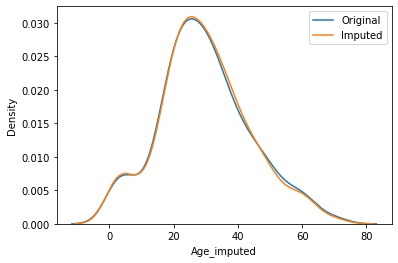

In [10]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

#### Compare the variance before and after imputation

In [11]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  198.46859854296054


#### Check the covariance after imputation

In [12]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,52.407827
Age,71.512440,204.349513,204.349513
Age_imputed,52.407827,204.349513,198.468599


#### Plot a boxplot to see outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


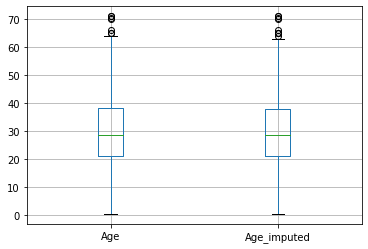

In [13]:
X_train[['Age', 'Age_imputed']].boxplot()

#### Below is a sample code. When implementing Random Imputation in Production we need to ensure that for a given missing input for a feature we should always impute with the same Random value. Below code will ensure this.

In [14]:
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

### Imputation for Categorical Data

In [15]:
data = pd.read_csv('/content/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
1048,TA,TA,115000
1127,Gd,TA,259000
1091,NaN,TA,160000
419,Fa,TA,142000


In [16]:
# Check the percentage of missing data
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [17]:
# Separate independent and dependent variables Separate
X = data #Intentionally retained whole dataset as need to plot graphs toward the end of the notebook
y = data['SalePrice']

# Perfrom train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000


In [18]:
# Create New Columns which will store Imputed Values

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [19]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
796,TA,TA,143500,TA,TA
491,TA,TA,133000,TA,TA
780,TA,TA,176000,TA,TA
901,NaN,TA,153000,TA,NaN
270,Gd,TA,266000,TA,Gd


#### Logic to impute missing values with random values is in below cell

In [20]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [21]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp.sample(5)

,original,imputed
Ex,0.000907,0.000856
Fa,0.037171,0.035959
Po,0.000907,0.000856
TA,0.951043,0.952911
Gd,0.009973,0.009418


In [22]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp.sample(5)

,original,imputed
Po,0.027823,0.028253
Fa,0.040917,0.040240
Gd,0.494272,0.496575
TA,0.412439,0.409247
Ex,0.024550,0.025685


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

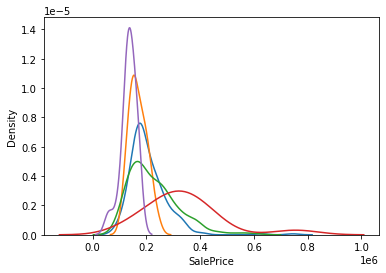

In [23]:
# Check the distribution
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

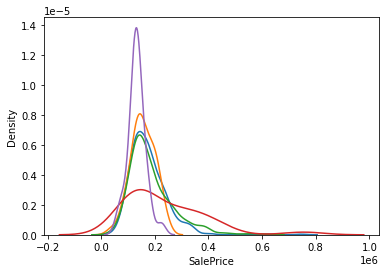

In [24]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()